In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the commodity price data
commodity_data = pd.read_csv('CornFutures_ZC_CBT.csv')
commodity_data = commodity_data.rename(columns={'Date': 'DATE'})
commodity_data = commodity_data.set_index('DATE')

# Load the weather data for different locations
weather_data_arg = pd.read_csv('Argentina_Weather.csv', index_col='DATE')
weather_data_bra = pd.read_csv('Brazil_Weather.csv', index_col='DATE')
weather_data_cal = pd.read_csv('California_Weather.csv', index_col='DATE')
weather_data_ill = pd.read_csv('Illinois_Weather.csv', index_col='DATE')
weather_data_iow = pd.read_csv('Iowa_Weather.csv', index_col='DATE')
weather_data_min = pd.read_csv('Minnesota_Weather.csv', index_col='DATE')
weather_data_neb = pd.read_csv('Nebraska_Weather.csv', index_col='DATE')

In [3]:
commodity_data

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2018-01-02,351.25,354.00,350.50,353.25,353.25,150143
2018-01-03,353.00,354.75,352.25,353.00,353.00,138593
2018-01-04,353.00,353.50,350.25,351.00,351.00,179965
2018-01-05,350.75,352.25,350.25,351.25,351.25,143914
2018-01-08,350.75,351.50,346.75,347.25,347.25,274879
...,...,...,...,...,...,...
2022-12-23,659.50,667.75,659.25,666.25,666.25,94496
2022-12-27,669.00,675.75,667.25,674.75,674.75,123172
2022-12-28,673.25,683.50,672.75,682.75,682.75,122193


In [4]:
# Merge the commodity data and weather data into a single DataFrame
data_arg = pd.merge(commodity_data, weather_data_arg, on='DATE')
data_bra = pd.merge(commodity_data, weather_data_bra, on='DATE')
data_cal = pd.merge(commodity_data, weather_data_cal, on='DATE')
data_ill = pd.merge(commodity_data, weather_data_ill, on='DATE')
data_iow = pd.merge(commodity_data, weather_data_iow, on='DATE')
data_min = pd.merge(commodity_data, weather_data_min, on='DATE')
data_neb = pd.merge(commodity_data, weather_data_neb, on='DATE')

In [5]:
data_arg

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,351.25,354.00,350.50,353.25,353.25,150143,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,353.00,354.75,352.25,353.00,353.00,138593,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,353.00,353.50,350.25,351.00,351.00,179965,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,350.75,352.25,350.25,351.25,351.25,143914,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,350.75,351.50,346.75,347.25,347.25,274879,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,659.50,667.75,659.25,666.25,666.25,94496,22.800000,43.5,1.0,0.137912,9.341758
2022-12-27,669.00,675.75,667.25,674.75,674.75,123172,22.661798,36.7,2.7,0.023708,7.328090
2022-12-28,673.25,683.50,672.75,682.75,682.75,122193,22.579070,37.6,0.7,0.067294,7.233721


In [6]:
train_data_arg = data_arg[:'2022-12']
test_data_arg = data_arg['2022-12':]

train_data_bra = data_bra[:'2022-12']
test_data_bra = data_bra['2022-12':]

train_data_cal = data_cal[:'2022-12']
test_data_cal = data_cal['2022-12':]

train_data_ill = data_ill[:'2022-12']
test_data_ill = data_ill['2022-12':]

train_data_iow = data_iow[:'2022-12']
test_data_iow = data_iow['2022-12':]

train_data_min = data_min[:'2022-12']
test_data_min = data_min['2022-12':]

train_data_neb = data_neb[:'2022-12']
test_data_neb = data_neb['2022-12':]


In [49]:
train_data_arg.shape

(1234, 11)

In [8]:
# For ARG
exog_train_arg = train_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_arg = test_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For BRA
exog_train_bra = train_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_bra = test_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For CAL
exog_train_cal = train_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_cal = test_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For ILL
exog_train_ill = train_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_ill = test_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For IOW
exog_train_iow = train_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_iow = test_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For MIN
exog_train_min = train_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_min = test_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For NEB
exog_train_neb = train_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_neb = test_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]


In [9]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

AutoARIMA using weather data

In [11]:
import pmdarima as pm
import matplotlib.pyplot as plt

In [12]:
# Fit the ARIMA model with exogenous variables
model_arg = pm.auto_arima(train_data_arg['Close'], exogenous=exog_train_arg, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_arg.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1234
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4542.780
Date:                Wed, 05 Apr 2023   AIC                           9101.561
Time:                        10:41:45   BIC                           9142.498
Sample:                             0   HQIC                          9116.961
                               - 1234                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.2214      0.158     -1.399      0.162      -0.532       0.089
Mean_Precip        1.2353      3.083      0.401      0.689      -4.807       7.277
Mean_WindSpeed    -0.0185      0.243

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


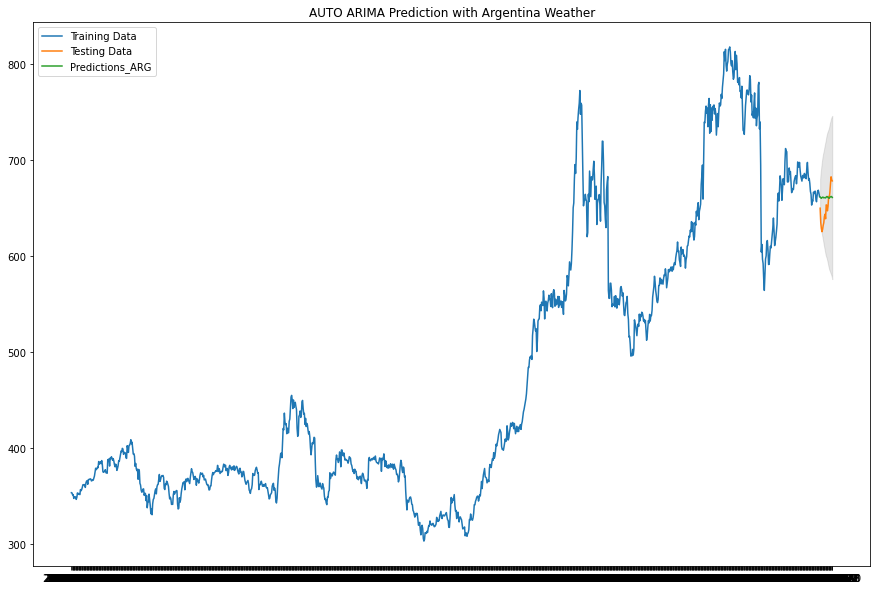

In [13]:
# Forecast
forecast_arg, confint_arg = model_arg.predict(n_periods=len(test_data_arg), 
                                               exogenous=exog_test_arg, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_arg = pd.DataFrame(forecast_arg, index=test_data_arg.index, columns=['Predictions_ARG'])
confint_arg = pd.DataFrame(confint_arg, index=test_data_arg.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_arg.index, pred_arg['Predictions_ARG'], label='Predictions_ARG')
plt.fill_between(confint_arg.index, confint_arg['Lower_CI'], confint_arg['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Argentina Weather')
plt.show()

In [14]:
# Fit the ARIMA model with exogenous variables for BRA
model_bra = pm.auto_arima(train_data_bra['Close'], exogenous=exog_train_bra, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)
# Print the summary of the model
print(model_bra.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1234
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -4535.475
Date:                Wed, 05 Apr 2023   AIC                           9092.949
Time:                        10:42:38   BIC                           9149.239
Sample:                             0   HQIC                          9114.125
                               - 1234                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.4657      0.276     -1.690      0.091      -1.006       0.074
Mean_Precip       29.9428     15.393      1.945      0.052      -0.226      60.112
Mean_WindSpeed     1.0848      0.537

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


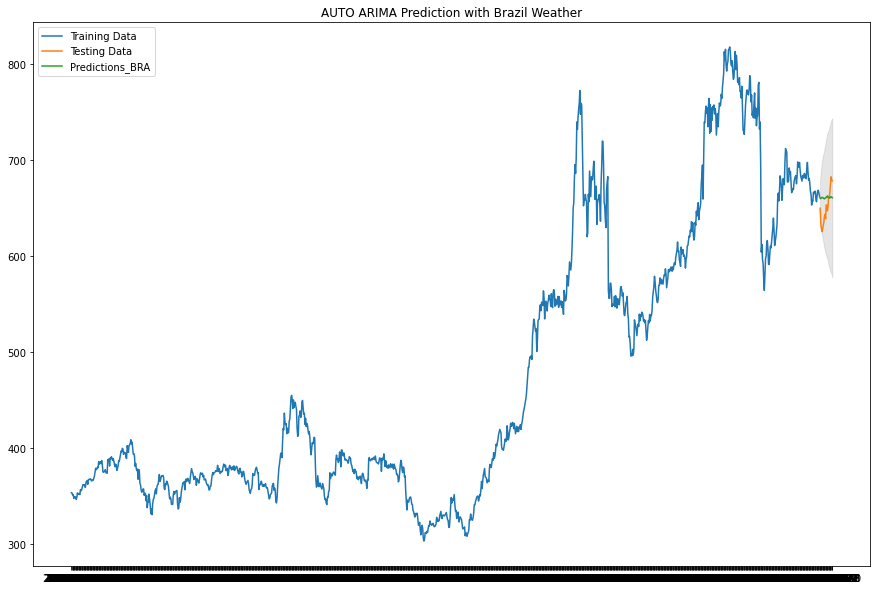

In [15]:
# Forecast for Brazil
forecast_bra, confint_bra = model_bra.predict(n_periods=len(test_data_bra), 
                                               exogenous=exog_test_bra, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame for Brazil
pred_bra = pd.DataFrame(forecast_bra, index=test_data_bra.index, columns=['Predictions_BRA'])
confint_bra = pd.DataFrame(confint_bra, index=test_data_bra.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval for Brazil
plt.figure(figsize=(15, 10))
plt.plot(train_data_bra.index, train_data_bra['Close'], label='Training Data')
plt.plot(test_data_bra.index, test_data_bra['Close'], label='Testing Data')
plt.plot(pred_bra.index, pred_bra['Predictions_BRA'], label='Predictions_BRA')
plt.fill_between(confint_bra.index, confint_bra['Lower_CI'], confint_bra['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Brazil Weather')
plt.show()

In [16]:
# Fit the ARIMA model with exogenous variables for California
model_cal = pm.auto_arima(train_data_cal['Close'], exogenous=exog_train_cal, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model for California
print(model_cal.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4549.334
Date:                Wed, 05 Apr 2023   AIC                           9114.668
Time:                        10:43:09   BIC                           9155.619
Sample:                             0   HQIC                          9130.072
                               - 1236                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp          0.0745      0.181      0.411      0.681      -0.281       0.430
Mean_Precip       -1.7728      5.753     -0.308      0.758     -13.048       9.503
Mean_WindSpeed     0.1662      0.256

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


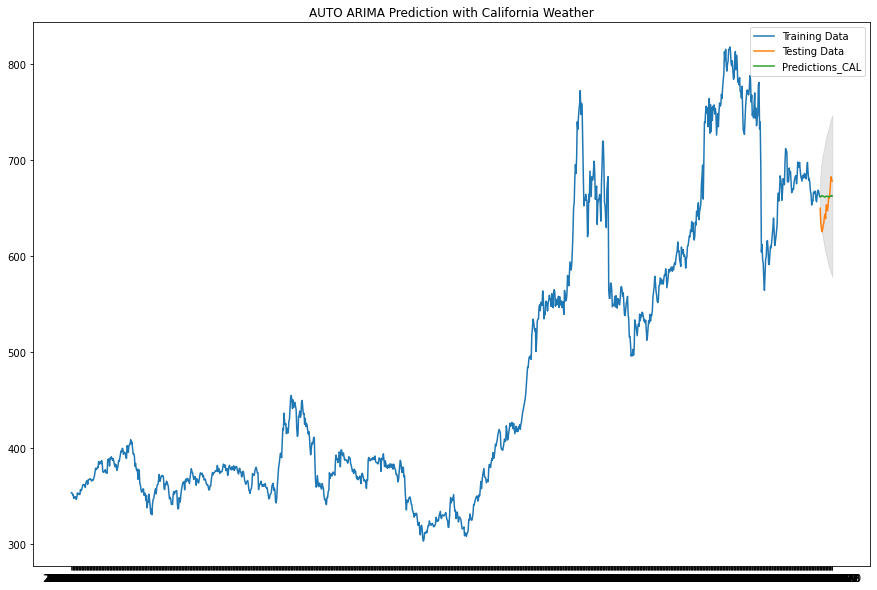

In [17]:
# Forecast for California
forecast_cal, confint_cal = model_cal.predict(n_periods=len(test_data_cal), 
                                               exogenous=exog_test_cal, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame for California
pred_cal = pd.DataFrame(forecast_cal, index=test_data_cal.index, columns=['Predictions_CAL'])
confint_cal = pd.DataFrame(confint_cal, index=test_data_cal.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval for California
plt.figure(figsize=(15, 10))
plt.plot(train_data_cal.index, train_data_cal['Close'], label='Training Data')
plt.plot(test_data_cal.index, test_data_cal['Close'], label='Testing Data')
plt.plot(pred_cal.index, pred_cal['Predictions_CAL'], label='Predictions_CAL')
plt.fill_between(confint_cal.index, confint_cal['Lower_CI'], confint_cal['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with California Weather')
plt.show()

In [18]:
# Fit the ARIMA model with exogenous variables using auto_arima
model_ill = pm.auto_arima(train_data_ill['Close'], exogenous=exog_train_ill, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_ill.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4547.740
Date:                Wed, 05 Apr 2023   AIC                           9111.481
Time:                        10:43:40   BIC                           9152.431
Sample:                             0   HQIC                          9126.885
                               - 1236                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0240      0.084     -0.285      0.776      -0.189       0.141
Mean_Precip       -1.0080      1.756     -0.574      0.566      -4.451       2.435
Mean_WindSpeed    -0.1332      0.123

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


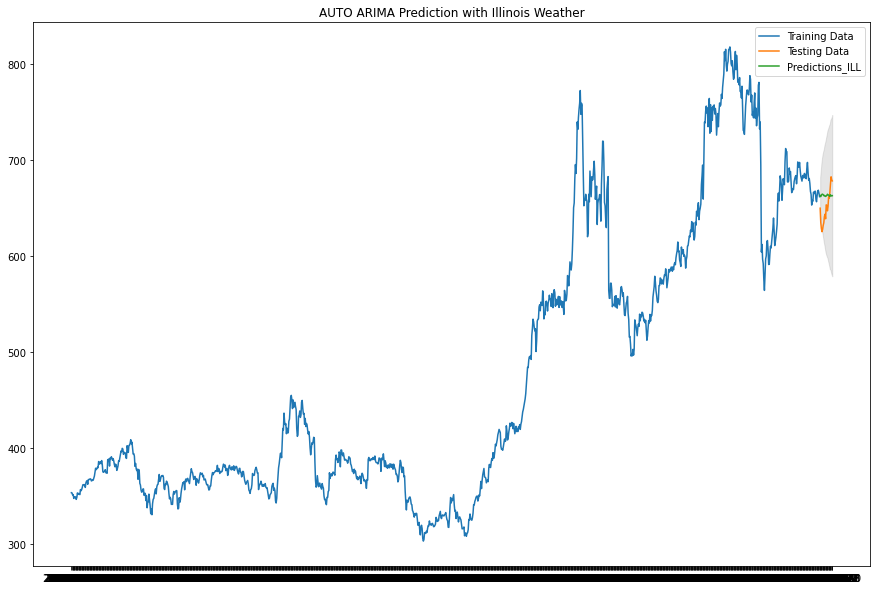

In [19]:
# Forecast
forecast_ill, confint_ill = model_ill.predict(n_periods=len(test_data_ill), 
                                               exogenous=exog_test_ill, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_ill = pd.DataFrame(forecast_ill, index=test_data_ill.index, columns=['Predictions_ILL'])
confint_ill = pd.DataFrame(confint_ill, index=test_data_ill.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_ill.index, train_data_ill['Close'], label='Training Data')
plt.plot(test_data_ill.index, test_data_ill['Close'], label='Testing Data')
plt.plot(pred_ill.index, pred_ill['Predictions_ILL'], label='Predictions_ILL')
plt.fill_between(confint_ill.index, confint_ill['Lower_CI'], confint_ill['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Illinois Weather')
plt.show()

In [20]:
# Fit the ARIMA model with exogenous variables using auto_arima
model_iow = pm.auto_arima(train_data_iow['Close'], exogenous=exog_train_iow, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_iow.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4546.107
Date:                Wed, 05 Apr 2023   AIC                           9108.213
Time:                        10:44:11   BIC                           9149.164
Sample:                             0   HQIC                          9123.617
                               - 1236                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0310      0.068     -0.455      0.649      -0.165       0.103
Mean_Precip       -3.4802      2.145     -1.623      0.105      -7.684       0.724
Mean_WindSpeed    -0.1053      0.098

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


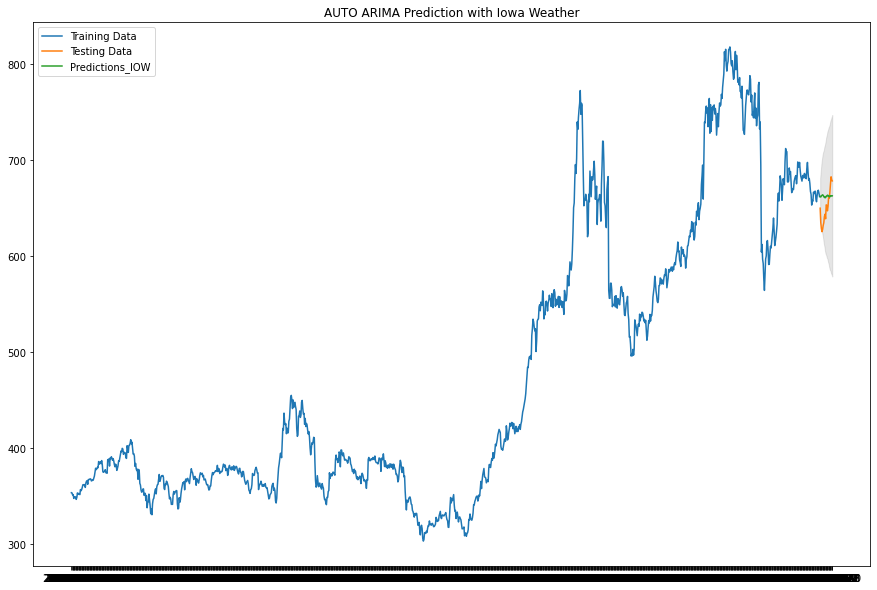

In [21]:
forecast_iow, confint_iow = model_iow.predict(n_periods=len(test_data_iow), 
                                               exogenous=exog_test_iow, return_conf_int=True)

pred_iow = pd.DataFrame(forecast_iow, index=test_data_iow.index, columns=['Predictions_IOW'])
confint_iow = pd.DataFrame(confint_iow, index=test_data_iow.index, columns=['Lower_CI', 'Upper_CI'])

plt.figure(figsize=(15, 10))
plt.plot(train_data_iow.index, train_data_iow['Close'], label='Training Data')
plt.plot(test_data_iow.index, test_data_iow['Close'], label='Testing Data')
plt.plot(pred_iow.index, pred_iow['Predictions_IOW'], label='Predictions_IOW')
plt.fill_between(confint_iow.index, confint_iow['Lower_CI'], confint_iow['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Iowa Weather')
plt.show()

In [22]:
# Fit the ARIMA model with exogenous variables
model_min = pm.auto_arima(train_data_min['Close'], exogenous=exog_train_min, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_min.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4548.968
Date:                Wed, 05 Apr 2023   AIC                           9113.937
Time:                        10:44:44   BIC                           9154.887
Sample:                             0   HQIC                          9129.341
                               - 1236                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp         -0.0645      0.072     -0.891      0.373      -0.206       0.077
Mean_Precip       -1.2577      2.468     -0.510      0.610      -6.095       3.580
Mean_WindSpeed    -0.0269      0.102

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


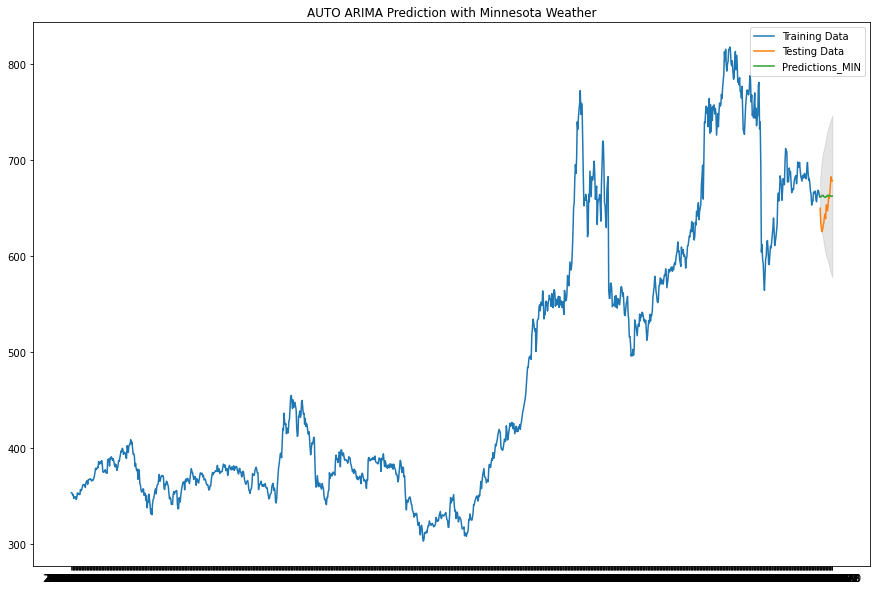

In [23]:
# Forecast
forecast_min, confint_min = model_min.predict(n_periods=len(test_data_min), 
                                               exogenous=exog_test_min, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_min = pd.DataFrame(forecast_min, index=test_data_min.index, columns=['Predictions_MIN'])
confint_min = pd.DataFrame(confint_min, index=test_data_min.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_min.index, train_data_min['Close'], label='Training Data')
plt.plot(test_data_min.index, test_data_min['Close'], label='Testing Data')
plt.plot(pred_min.index, pred_min['Predictions_MIN'], label='Predictions_MIN')
plt.fill_between(confint_min.index, confint_min['Lower_CI'], confint_min['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Minnesota Weather')
plt.show()

In [24]:
# Fit the ARIMA model with exogenous variables
model_neb = pm.auto_arima(train_data_neb['Close'], exogenous=exog_train_neb, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_neb.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4549.101
Date:                Wed, 05 Apr 2023   AIC                           9114.203
Time:                        10:45:15   BIC                           9155.153
Sample:                             0   HQIC                          9129.607
                               - 1236                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp          0.0243      0.065      0.374      0.708      -0.103       0.152
Mean_Precip       -1.0923      2.137     -0.511      0.609      -5.280       3.095
Mean_WindSpeed    -0.0633      0.111

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


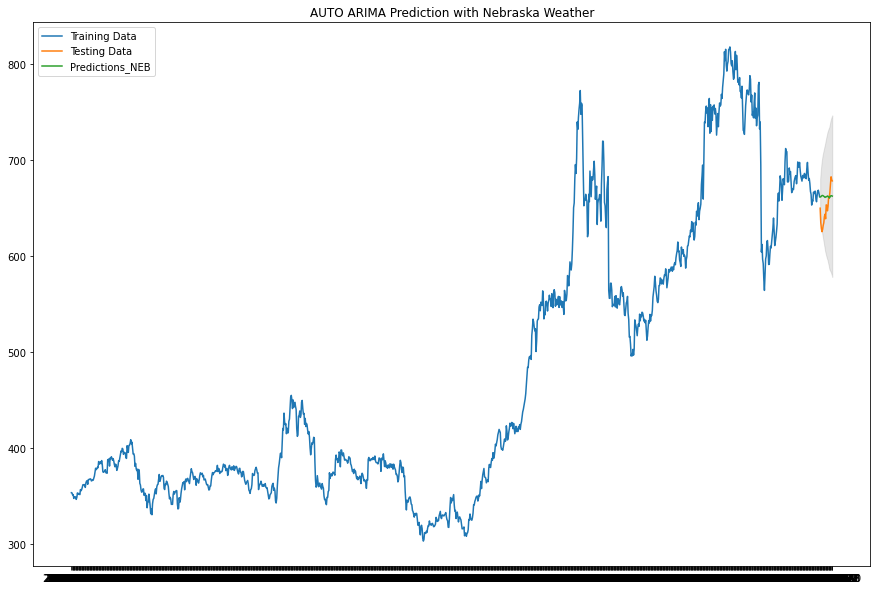

In [25]:
# Forecast
forecast_neb, confint_neb = model_neb.predict(n_periods=len(test_data_neb), 
                                               exogenous=exog_test_neb, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_neb = pd.DataFrame(forecast_neb, index=test_data_neb.index, columns=['Predictions_NEB'])
confint_neb = pd.DataFrame(confint_neb, index=test_data_neb.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_neb.index, train_data_neb['Close'], label='Training Data')
plt.plot(test_data_neb.index, test_data_neb['Close'], label='Testing Data')
plt.plot(pred_neb.index, pred_neb['Predictions_NEB'], label='Predictions_NEB')
plt.fill_between(confint_neb.index, confint_neb['Lower_CI'], confint_neb['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Nebraska Weather')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1234
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4532.345
Date:                Wed, 05 Apr 2023   AIC                           9116.689
Time:                        11:52:18   BIC                           9249.736
Sample:                             0   HQIC                          9166.740
                               - 1234                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Mean_Temp_arg         -0.2157      0.195     -1.108      0.268      -0.597       0.166
Mean_Precip_arg        1.5104      3.293      0.459      0.646      -4.943       7.964
Mean_WindSpeed_arg  

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


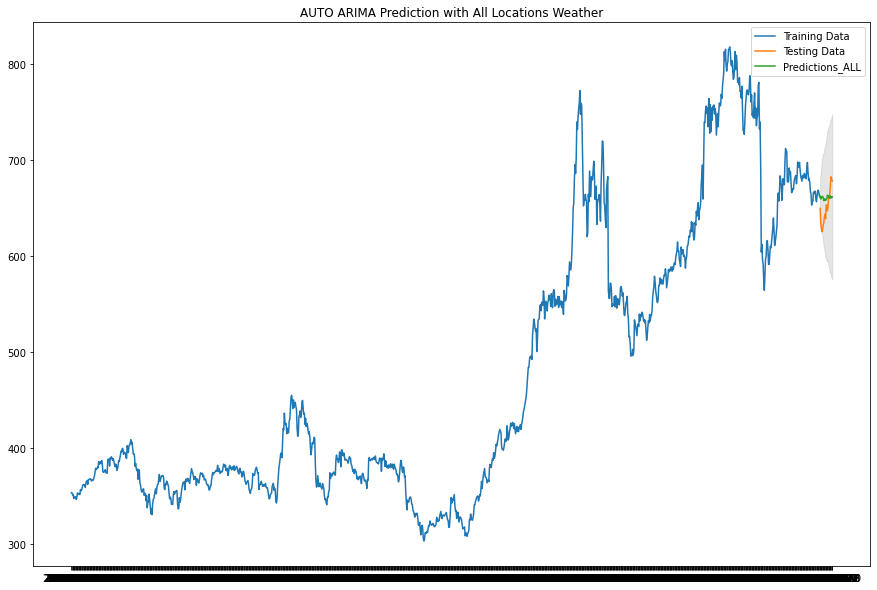

In [56]:
# Concatenate weather data for all locations
exog_train_all = pd.concat([exog_train_arg.add_suffix('_arg'), exog_train_bra.add_suffix('_bra'), 
                            exog_train_cal.add_suffix('_cal'), exog_train_ill.add_suffix('_ill'), 
                            exog_train_iow.add_suffix('_iow'), exog_train_min.add_suffix('_min'), 
                            exog_train_neb.add_suffix('_neb')], axis=1)
exog_test_all = pd.concat([exog_test_arg, exog_test_bra, exog_test_cal, exog_test_ill, 
                           exog_test_iow, exog_test_min, exog_test_neb], axis=1)

exog_train_all.dropna(inplace=True)

# Fit the ARIMA model with exogenous variables
model_all = pm.auto_arima(train_data_arg['Close'], exogenous=exog_train_all, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_all.summary())

# Forecast
forecast_all, confint_all = model_all.predict(n_periods=len(test_data_arg), 
                                               exogenous=exog_test_all, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_all = pd.DataFrame(forecast_all, index=test_data_arg.index, columns=['Predictions_ALL'])
confint_all = pd.DataFrame(confint_all, index=test_data_arg.index, columns=['Lower_CI_ALL', 'Upper_CI_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_all.index, pred_all['Predictions_ALL'], label='Predictions_ALL')
plt.fill_between(confint_all.index, confint_all['Lower_CI_ALL'], confint_all['Upper_CI_ALL'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with All Locations Weather')
plt.show()